In [1]:
import numpy as np
import pylab as plt
import matplotlib
import glob
#import h5py
from astropy.io import fits

import sys
sys.path.insert(0,'../rficnn/')
import rficnn as rfc

%matplotlib inline

In [2]:
files = glob.glob('/home/anke/HIDE_simulations/hide_sims_train/calib_1year/*.fits')
#sim_files = files[:100]
sim_files = files[:2]
test_files = files[4:]

In [3]:
dp = rfc.DataProvider(files=sim_files, label_name='RFI_MASK', ) # make the new 3 class rfi_mask

In [4]:
data,rfi = dp(1)

In [5]:
thresholds=[1e-10,0.1]
th_labels = [0,1,2]
mask = rfc.threshold_mask(data,rfi,thresholds=thresholds, th_labels=th_labels)

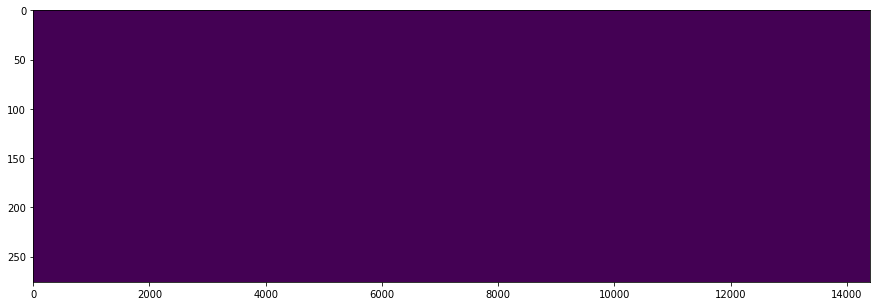

In [6]:
#dp = rfc.DataProvider(files=sim_files,label_name='rfi_map',
#                      thresholds=thresholds,
#                      th_labels=th_labels,
#                      a_min=0, a_max=200)
#x,y = dp(1)
fig, (ax3) = plt.subplots(1,1,figsize=(15,5))
#ax1.imshow(data[0,:,:,0],aspect='auto')
#ax2.imshow(rfi[0,:,:,0],aspect='auto')


#pcm = ax3[0[.pcolor(mask, Z,
 #                  norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
  #                 cmap='PuBu_r')
# norm=matplotlib.colors.LogNorm(vmin=mask.min(), vmax=mask.max())
some = ax3.imshow(mask[0,:,:,0],aspect='auto')
#some.colorbar(mask, ax=ax3)
#some.savefig('mask.png',bb_inches='tight',format='png')

In [7]:
nx,ny = 276,400
dp2 = rfc.DataProvider(files=sim_files,label_name='RFI_MASK',
                      nx=nx,ny=ny,
                      thresholds=thresholds,
                      th_labels=th_labels,
                      a_min=0, a_max=200)

In [8]:
conv = rfc.ConvolutionalLayers(nx=nx,ny=ny,n_channel=1,restore=0,
                        model_add='./model',arch_file_name='arch')

In [9]:
conv.train(data_provider=dp2,training_epochs = 5,n_s = 10,
           learning_rate = 0.001, dropout=0.7, time_limit=1, verbose=1)

Epoch:0, cost= 253741.712500
Epoch:1, cost= 203173.862500
Epoch:2, cost= 180917.737500
Epoch:3, cost= 183498.317188
Epoch:4, cost= 168723.826563


In [10]:
data2, rfi2 = dp2(1)

In [11]:
pred = conv.conv_large_image(rfi2,pad=10,lx=nx,ly=ny)

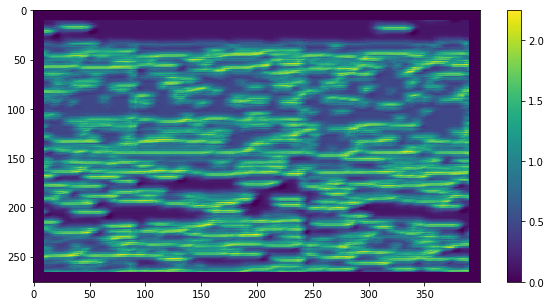

In [12]:
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
maskimage = ax1.imshow(pred,aspect='auto')
#ax2.imshow(y[0,:,:,0],aspect='auto')
colorbar = plt.colorbar(maskimage)

(array([  1.32500000e+04,   1.18000000e+02,   1.69000000e+02,
          2.75000000e+02,   5.78100000e+03,   1.52200000e+03,
          7.83000000e+02,   1.03900000e+03,   6.51000000e+02,
          6.65000000e+02,   7.85000000e+02,   7.29000000e+02,
          8.67000000e+02,   1.13400000e+03,   2.04400000e+03,
          3.90300000e+03,   2.53800000e+03,   2.45800000e+03,
          2.43700000e+03,   2.19700000e+03,   2.15700000e+03,
          2.20800000e+03,   2.16400000e+03,   2.38100000e+03,
          2.32900000e+03,   2.18600000e+03,   2.15700000e+03,
          2.11700000e+03,   2.25800000e+03,   2.37000000e+03,
          2.45800000e+03,   2.36500000e+03,   2.23800000e+03,
          2.12200000e+03,   2.08700000e+03,   1.96900000e+03,
          1.84400000e+03,   1.76300000e+03,   1.80100000e+03,
          1.68300000e+03,   1.63900000e+03,   1.64200000e+03,
          1.46900000e+03,   1.42500000e+03,   1.39800000e+03,
          1.43300000e+03,   1.33800000e+03,   1.28400000e+03,
        

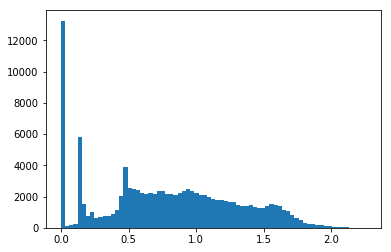

In [16]:
sorted_pred = np.ndarray.flatten(pred)
plt.hist(sorted_pred, bins='auto')